In [2]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Criando conexão com o SQL Server
conexao = (
    'DRIVER={SQL Server};Server=DESKTOP-UI3EFDM;Database=ContosoRetailDW;Trusted_Connection=yes')
conn = pyodbc.connect(conexao)

# Cursor
cur = conn.cursor()
print('Conexão bem sucedida!')

Conexão bem sucedida!


In [4]:
# Retornando as tabelas do banco
tabelas = pd.read_sql_query('SELECT * FROM information_schema.tables;', conn)
tabelas 

C:\Users\wende\AppData\Local\Temp\ipykernel_3920\3658772728.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tabelas = pd.read_sql_query('SELECT * FROM information_schema.tables;', conn)


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,ContosoRetailDW,dbo,DimMachine,BASE TABLE
1,ContosoRetailDW,dbo,DimProductSubcategory,BASE TABLE
2,ContosoRetailDW,dbo,DimProduct,BASE TABLE
3,ContosoRetailDW,dbo,DimProductCategory,BASE TABLE
4,ContosoRetailDW,dbo,DimEntity,BASE TABLE
5,ContosoRetailDW,dbo,V_ProductForecast,VIEW
6,ContosoRetailDW,dbo,DimSalesTerritory,BASE TABLE
7,ContosoRetailDW,dbo,V_CustomerOrders,VIEW
8,ContosoRetailDW,dbo,DimCurrency,BASE TABLE
9,ContosoRetailDW,dbo,V_OnlineSalesOrderDetail,VIEW


Ex1. O time comercial presia saber qual a proporção entre clientes pessoa física e clientes
pessoa jurídica para dimensionar melhor a equipe de vendas B2C e B2B. Para isso, você precisará fazer
um relatório que resuma o total de clientes PF e PJ.

In [5]:
# Usando o pandas para passar os comandos
sql = pd.read_sql_query('SELECT * FROM DimCustomer', conn)

C:\Users\wende\AppData\Local\Temp\ipykernel_3920\1704134050.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql = pd.read_sql_query('SELECT * FROM DimCustomer', conn)


In [6]:
# Criando um dataframe a partir do comando sql
dados = pd.DataFrame(sql)
dados.head(3)

,CustomerKey,GeographyKey,CustomerLabel,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CustomerType,CompanyName,ETLLoadID,LoadDate,UpdateDate
0,1,680,11000,None,Jon,V,Yang,False,1966-04-08,M,...,0.0,3761 N. 14th St,None,1 (11) 500 555-0162,2001-07-22,Person,None,1,2009-10-01,2009-10-01
1,2,692,11001,None,Eugene,L,Huang,False,1965-05-14,S,...,1.0,2243 W St.,None,1 (11) 500 555-0110,2001-07-18,Person,None,1,2009-10-01,2009-10-01
2,3,493,11002,None,Ruben,None,Torres,False,1965-08-12,M,...,1.0,5844 Linden Land,None,1 (11) 500 555-0184,2001-07-10,Person,None,1,2009-10-01,2009-10-01


In [7]:
# Tipos de clientes, Person = PF e Company = PJ
dados.CustomerType.unique()

array(['Person', 'Company'], dtype=object)

In [8]:
# Total de clientes por tipo
dados['CustomerType'].value_counts()

CustomerType
Person     18484
Company      385
Name: count, dtype: int64

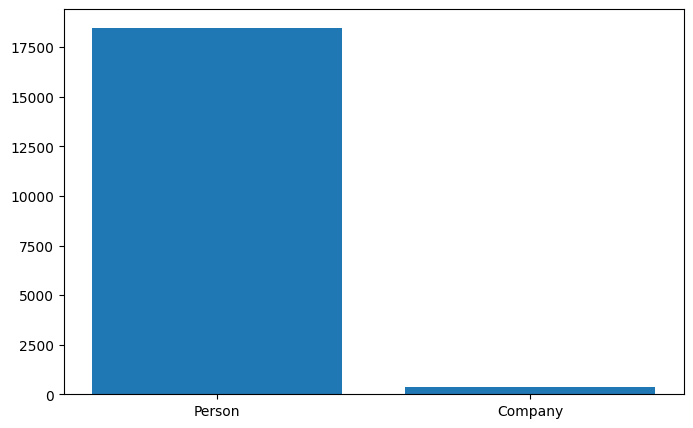

In [9]:
# Um grafico para resumir os valores
plt.figure(figsize=(8,5))
plt.bar(dados['CustomerType'].unique(), dados['CustomerType'].value_counts())
plt.show()

Ex2. Agora você é um analista de dados que dá suporte à área de RH. Você deverá preparar um relatório mostrando o total de funcionários para cada departamento, mais também subdividido por sexo.
Obs: Tome cuidado com essa análise!

In [10]:
# Retornando dados do banco
dados_rh = pd.read_sql_query('SELECT * FROM DimEmployee', conn)

C:\Users\wende\AppData\Local\Temp\ipykernel_3920\3312837731.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados_rh = pd.read_sql_query('SELECT * FROM DimEmployee', conn)


In [11]:
dados_rh.head(3)

,EmployeeKey,ParentEmployeeKey,FirstName,LastName,MiddleName,Title,HireDate,BirthDate,EmailAddress,Phone,...,VacationHours,CurrentFlag,SalesPersonFlag,DepartmentName,StartDate,EndDate,Status,ETLLoadID,LoadDate,UpdateDate
0,1,18.0,Kim,Abercrombie,None,Sales Region Manager,1996-07-31,1972-05-15,guy1@contoso.com,320-555-0195,...,40,True,False,Production,1996-07-31,None,Current,1,2009-08-01,2009-08-01
1,2,18.0,Sagiv,Hadaya,None,Sales Region Manager,1997-02-26,1977-06-03,kevin0@contoso.com,150-555-0189,...,40,True,False,Marketing,1997-02-26,None,Current,1,2009-08-01,2009-08-01
2,3,18.0,Luka,Abrus,None,Sales Region Manager,1997-12-12,1964-12-13,roberto0@contoso.com,212-555-0187,...,40,True,False,Engineering,1997-12-12,None,Current,1,2009-08-01,2009-08-01


In [12]:
# Tamanho dos dados
dados_rh.shape

(293, 27)

In [13]:
# Retornando as colunas
dados_rh.columns

Index(['EmployeeKey', 'ParentEmployeeKey', 'FirstName', 'LastName',
       'MiddleName', 'Title', 'HireDate', 'BirthDate', 'EmailAddress', 'Phone',
       'MaritalStatus', 'EmergencyContactName', 'EmergencyContactPhone',
       'SalariedFlag', 'Gender', 'PayFrequency', 'BaseRate', 'VacationHours',
       'CurrentFlag', 'SalesPersonFlag', 'DepartmentName', 'StartDate',
       'EndDate', 'Status', 'ETLLoadID', 'LoadDate', 'UpdateDate'],
      dtype='object')

In [14]:
dados_rh['DepartmentName'].unique()

array(['Production', 'Marketing', 'Engineering', 'Tool Design',
       "'Human Resources Contral", 'Production Control',
       'Information Services', 'Human Resources',
       'Shipping and Receiving', 'Quality Assurance',
       'Facilities and Maintenance', 'Document Control', 'Finance',
       'Research and Development', 'Executive', 'Purchasing', 'Sales'],
      dtype=object)

In [15]:
# Na coluna Status informa os funcionarios atuais e demitidos, retornando somente os atuais
dados_rh = dados_rh.loc[dados_rh['Status'] == 'Current']

In [16]:
# Quantidade de funcionarios por departamento e sexo
depart_gender = dados_rh.groupby('DepartmentName')['Gender'].value_counts().sort_values(ascending=False)
depart_gender

DepartmentName              Gender
Production                  M         131
                            F          45
Sales                       M          11
                            F           7
Purchasing                  M           7
Quality Assurance           M           6
Production Control          M           6
Information Services        M           6
Marketing                   M           5
Finance                     F           5
                            M           5
Facilities and Maintenance  M           5
Document Control            M           4
Purchasing                  F           4
Marketing                   F           4
Shipping and Receiving      M           4
Information Services        F           4
Human Resources             M           4
Engineering                 F           3
                            M           3
Tool Design                 M           3
Human Resources             F           2
Shipping and Receiving      F           2

Ex3. Você é responsavel pelo time de Produtos da empresa e precisa enviar um relatório de controle
com o total de produtos para cada marca. Só que o seu gestor quer apenas as marcas que possuem mais que 
200 exemplares de produtos. ??

In [17]:
# Puxando os dados do banco
dados_prod = pd.read_sql_query('SELECT * FROM DimProduct', conn)
dados_prod = pd.DataFrame(dados_prod)
dados_prod.head(3)

C:\Users\wende\AppData\Local\Temp\ipykernel_3920\442626174.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados_prod = pd.read_sql_query('SELECT * FROM DimProduct', conn)


,ProductKey,ProductLabel,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassID,ClassName,StyleID,...,UnitCost,UnitPrice,AvailableForSaleDate,StopSaleDate,Status,ImageURL,ProductURL,ETLLoadID,LoadDate,UpdateDate
0,1,0101001,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-25 08:01:12,2008-05-25 08:01:12
1,2,0101002,Contoso 512MB MP3 Player E51 Blue,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,5,...,6.62,12.99,2005-05-03,None,On,None,None,1,2008-05-26 08:01:12,2008-05-26 08:01:12
2,3,0101003,Contoso 1G MP3 Player E100 White,1GB flash memory and USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,1,Economy,1,...,7.40,14.52,2006-05-13,None,On,None,None,1,2008-05-27 08:01:12,2008-05-27 08:01:12


In [18]:
# tratamento de duplicados, usando strip para retirar todos os espaços
dados_prod['BrandName'] = dados_prod['BrandName'].str.strip()

In [19]:
# Verificando os valores unicos
dados_prod['BrandName'].unique()

array(['Contoso', 'Wide World Importers', 'Northwind Traders',
       'Adventure Works', 'Southridge Video', 'Litware', 'Fabrikam',
       'Proseware', 'A. Datum', 'The Phone Company', 'Tailspin Toys'],
      dtype=object)

In [20]:
# Usando o groupby para agrupar as marcas trazendo a quantidade dos valores por marca
brand_prod = dados_prod.groupby('BrandName')['ProductName'].size().sort_values(ascending=False)
brand_prod

BrandName
Contoso                 710
Fabrikam                267
Litware                 264
Proseware               244
Adventure Works         192
Southridge Video        192
Wide World Importers    173
The Phone Company       152
Tailspin Toys           144
A. Datum                132
Northwind Traders        47
Name: ProductName, dtype: int64

Ex4. Você é responsavel por controlar os dados de clientes e de produtos da sua empresa. Confirme se:

- a. Existem 2.517 produtos cadastrados na base e, se não tiver, você deverá reportar ao seu gestor  para saber se existe alguma defasagem no controle dos produtos. Quantidade de produtos se mantém

- b. Até o mês passado, a empresa tinha um total de 19.500 clientes na base de controle. Verifique se esse número aumentou ou reduziu. Quantidade atual reduziu tendo 18.869 clientes

In [21]:
# Quantidade de produtos cadastrados na base de dados
dados_prod['ProductName'].shape

(2517,)

In [22]:
# Quantidade atual de clientes cadastrados é 18.869, número de clientes reduziu
dados['CustomerKey'].shape

(18869,)

Ex5. Você trabalha no setor de marketing da empresa Contoso e acaba de ter uma ideia de oferecer 
descontos especiais para os clientes no dia de seus aniversários. Para isso, você vai precisar
listar todos os clientes e as suas respectivas datas de nascimento, além de um contato. 

- a. Selecione as colunas: CustomerKey, FirstName, EmailAddress, BirthDate da tabela DimCustomer
- b. Renomeie as colunas dessa tabela usando o alias 

In [23]:
# Selecionando as colunas solicitadas
dados[['CustomerKey','FirstName','EmailAddress','BirthDate']].head(10)

,CustomerKey,FirstName,EmailAddress,BirthDate
0,1,Jon,jon24@adventure-works.com,1966-04-08
1,2,Eugene,eugene10@adventure-works.com,1965-05-14
2,3,Ruben,ruben35@adventure-works.com,1965-08-12
3,4,Christy,christy12@adventure-works.com,1968-02-15
4,5,Elizabeth,elizabeth5@adventure-works.com,1968-08-08
5,6,Julio,julio1@adventure-works.com,1965-08-05
6,7,Janet,janet9@adventure-works.com,1965-12-06
7,8,Marco,marco14@adventure-works.com,1964-05-09
8,9,Rob,rob4@adventure-works.com,1964-07-07
9,10,Shannon,shannon38@adventure-works.com,1964-04-01


In [24]:
# Renomeando essas colunas
df_col = dados[['CustomerKey','FirstName','EmailAddress','BirthDate']]
df_col.columns = ['Id_Cliente', 'Primeiro_Nome', 'Email_Cliente', 'Data_Nascimento']
df_col.head(10)

,Id_Cliente,Primeiro_Nome,Email_Cliente,Data_Nascimento
0,1,Jon,jon24@adventure-works.com,1966-04-08
1,2,Eugene,eugene10@adventure-works.com,1965-05-14
2,3,Ruben,ruben35@adventure-works.com,1965-08-12
3,4,Christy,christy12@adventure-works.com,1968-02-15
4,5,Elizabeth,elizabeth5@adventure-works.com,1968-08-08
5,6,Julio,julio1@adventure-works.com,1965-08-05
6,7,Janet,janet9@adventure-works.com,1965-12-06
7,8,Marco,marco14@adventure-works.com,1964-05-09
8,9,Rob,rob4@adventure-works.com,1964-07-07
9,10,Shannon,shannon38@adventure-works.com,1964-04-01


Ex6. A Contoso está comemorando aniversário de inauguração de 10 anos e pretende fazer uma ação de 
premiação para os clientes. A empresa quer presentear os primeiros clientes desde a inauguração. Você
foi alocado para levar adiante essa ação, para isso você terá que fazer o seguinte:

A Contoso decidiu presentear os primeiros 100 clientes da história com um vale compras de R$ 10.000.
Utilize um comando em SQL para retornar uma tabela com os primeiros 100 clientes da tabela DimCustomers 


In [25]:
# Retornando os 100 primeiros IDs, selecionando pelos primeiros clientes a comprar um produto
dados.loc[dados['CustomerType'] == 'Person'].sort_values(by=['DateFirstPurchase']).head(100)

,CustomerKey,GeographyKey,CustomerLabel,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CustomerType,CompanyName,ETLLoadID,LoadDate,UpdateDate
3,4,519,11003,None,Christy,None,Zhu,False,1968-02-15,S,...,1.0,1825 Village Pl.,None,1 (11) 500 555-0162,2001-07-01,Person,None,1,2009-10-01,2009-10-01
17389,17390,528,28389,None,Rachael,M,Martinez,False,1964-12-18,S,...,0.0,"14, avenue du Port",None,1 (11) 500 555-0190,2001-07-01,Person,None,1,2009-10-01,2009-10-01
10768,10769,511,21768,None,Cole,A,Watson,False,1946-08-22,S,...,3.0,601 Asilomar Dr.,None,110-555-0129,2001-07-01,Person,None,1,2009-10-01,2009-10-01
14863,14864,500,25863,None,Sydney,S,Wright,False,1946-12-03,S,...,3.0,4193 E. 28th Street,None,285-555-0113,2001-07-01,Person,None,1,2009-10-01,2009-10-01
3501,3502,430,14501,None,Ruben,None,Prasad,False,1938-05-13,M,...,2.0,249 Alexander Pl.,None,175-555-0159,2001-07-01,Person,None,1,2009-10-01,2009-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5484,5485,553,16484,None,Dustin,A,Lal,False,1950-02-07,M,...,2.0,3193 Mehaffey Way,None,1 (11) 500 555-0119,2001-07-22,Person,None,1,2009-10-01,2009-10-01
18385,18386,586,29385,None,Don,A,Lal,False,1963-03-05,S,...,1.0,Werftstr 566,None,1 (11) 500 555-0172,2001-07-22,Person,None,1,2009-10-01,2009-10-01
29,30,425,11029,None,Jimmy,L,Moreno,False,1946-12-21,M,...,2.0,6385 Mark Twain,None,1 (11) 500 555-0146,2001-07-22,Person,None,1,2009-10-01,2009-10-01
5521,5522,637,16521,None,Tonya,L,She,False,1979-08-11,S,...,0.0,8534 Willow Pass Road,None,1 (11) 500 555-0172,2001-07-23,Person,None,1,2009-10-01,2009-10-01


Ex7. A empresa Contoso precisa fazer contato com os fornecedores de produtos para repor o estoque.
Você é da área de compras e precisa descobrir quem são esses fornecedores.

Retorne apenas os nomes dos fornecedores na tabela DimProduct e renomeie essa nova coluna da tabela

In [26]:
# Retornando os fabricantes
dados_prod['Manufacturer'].unique()

array(['Contoso, Ltd', 'Wide World Importers', 'Northwind Traders',
       'Adventure Works', 'Southridge Video', 'Litware, Inc.',
       'Fabrikam, Inc.', 'Proseware, Inc.', 'A. Datum Corporation',
       'The Phone Company', 'Tailspin Toys'], dtype=object)

Ex8. O seu trabalho de investigação não para. Você precisa descobrir se existe algum
produto registrado na base de produtos que ainda não tenha sido vendido. Tente chegar
nessa informação

In [7]:
# Retornando da tabela Faturamento de Venda os valores unicos das chaves dos produtos, vemos que um unico produto nao foi vendido
dados_sales = pd.DataFrame(pd.read_sql_query('SELECT DISTINCT(ProductKey) FROM FactSales' , conn))
dados_sales.shape

C:\Users\wende\AppData\Local\Temp\ipykernel_13424\103623740.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados_sales = pd.DataFrame(pd.read_sql_query('SELECT DISTINCT(ProductKey) FROM FactSales' , conn))


(2516, 1)

In [30]:
# Analise de faturamento por quantidade vendida, porem tabela é muito grande e esta dando erro de memoria ao carregar
dados_sales = pd.DataFrame(pd.read_sql_query('SELECT TOP(100) ProductName, SalesQuantity, SalesAmount FROM DimProduct, FactSales ORDER BY NEWID()' , conn))
dados_sales.head(5)

C:\Users\wende\AppData\Local\Temp\ipykernel_3920\1478043344.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados_sales = pd.DataFrame(pd.read_sql_query('SELECT TOP(100) ProductName, SalesQuantity, SalesAmount FROM DimProduct, FactSales ORDER BY NEWID()' , conn))
